In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GTerrence/dataset/main/wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [3]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


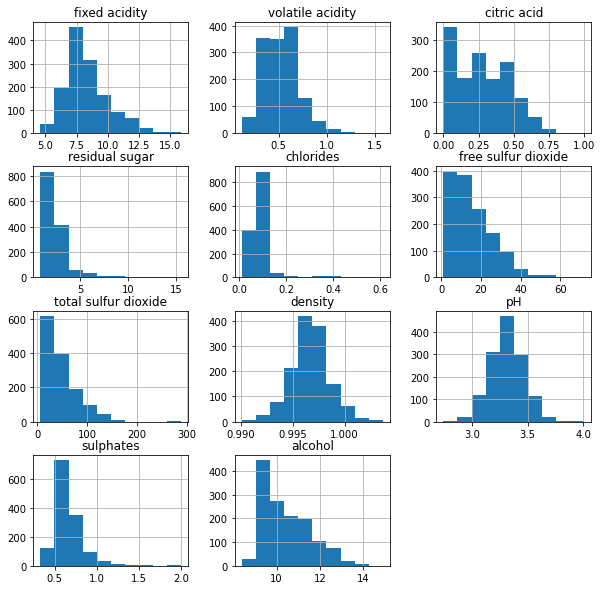

In [9]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()

In [10]:
citric_acid = df['citric acid'].median()

df.loc[(df['citric acid'] == 0), 'citric acid'] = citric_acid

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.294908,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.176899,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.160000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


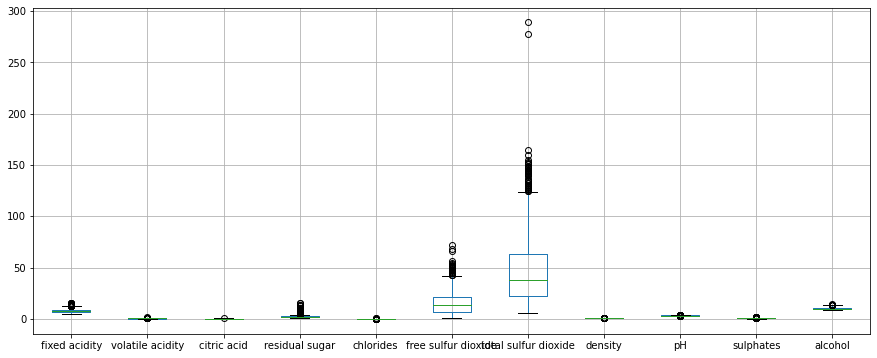

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 6))
df.boxplot()
plt.show()

In [12]:
#hapus outlier
#fixed acidity
median_fixed_acidity = df['fixed acidity'].median()

# Calculate the IQR and whiskers
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_fixedacidity = df[df['fixed acidity'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_fixedacidity['fixed acidity'] = median_fixed_acidity


median_total_sulfurdioxide = df['total sulfur dioxide'].median()

# Calculate the IQR and whiskers
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_totalsulfurdioxide = df[df['total sulfur dioxide'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_totalsulfurdioxide['total sulfur dioxide'] = median_total_sulfurdioxide


mean_density = df['density'].mean()

# Calculate the IQR and whiskers
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_density = df[df['density'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_density['density'] = mean_density



mean_pH = df['pH'].mean()

# Calculate the IQR and whiskers
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_pH = df[df['pH'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_pH['pH'] = mean_pH


median_volatile_acidity = df['volatile acidity'].median()

# Calculate the IQR and whiskers
Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_volatile_acidity = df[df['volatile acidity'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_volatile_acidity['volatile acidity'] = median_volatile_acidity


median_residual_sugar = df['residual sugar'].median()

# Calculate the IQR and whiskers
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_residual_sugar = df[df['residual sugar'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_residual_sugar['residual sugar'] = median_residual_sugar




median_chlorides = df['chlorides'].median()

# Calculate the IQR and whiskers
Q1 = df['chlorides'].quantile(0.25)
Q3 = df['chlorides'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_chlorides = df[df['chlorides'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_chlorides['chlorides'] = median_chlorides



median_free_sulfur_dioxide = df['free sulfur dioxide'].median()

# Calculate the IQR and whiskers
Q1 = df['free sulfur dioxide'].quantile(0.25)
Q3 = df['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_free_sulfur_dioxide = df[df['free sulfur dioxide'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_free_sulfur_dioxide['free sulfur dioxide'] = median_free_sulfur_dioxide



median_sulphates = df['sulphates'].median()

# Calculate the IQR and whiskers
Q1 = df['sulphates'].quantile(0.25)
Q3 = df['sulphates'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_sulphates = df[df['sulphates'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_sulphates['sulphates'] = median_sulphates


median_citric_acid = df['citric acid'].median()

# Calculate the IQR and whiskers
Q1 = df['citric acid'].quantile(0.25)
Q3 = df['citric acid'].quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

# Identify the rows that are outliers
outliers_citric_acid = df[df['citric acid'] > Upper_Whisker]

# Replace the 'fixed acidity' values in the outliers with the median
outliers_citric_acid['citric acid'] = median_citric_acid


# Replace outliers with median or mean
df.loc[df['fixed acidity'] > Upper_Whisker, 'fixed acidity'] = median_fixed_acidity
df.loc[df['total sulfur dioxide'] > Upper_Whisker, 'total sulfur dioxide'] = median_total_sulfurdioxide
df.loc[df['density'] > Upper_Whisker, 'density'] = mean_density
df.loc[df['pH'] > Upper_Whisker, 'pH'] = mean_pH
df.loc[df['volatile acidity'] > Upper_Whisker, 'volatile acidity'] = median_volatile_acidity
df.loc[df['residual sugar'] > Upper_Whisker, 'residual sugar'] = median_residual_sugar
df.loc[df['chlorides'] > Upper_Whisker, 'chlorides'] = median_chlorides
df.loc[df['free sulfur dioxide'] > Upper_Whisker, 'free sulfur dioxide'] = median_free_sulfur_dioxide
df.loc[df['sulphates'] > Upper_Whisker, 'sulphates'] = median_sulphates
df.loc[df['citric acid'] > Upper_Whisker, 'citric acid'] = median_citric_acid

C:\Users\mahazoya\AppData\Local\Temp\ipykernel_8808\3852734825.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_fixedacidity['fixed acidity'] = median_fixed_acidity
C:\Users\mahazoya\AppData\Local\Temp\ipykernel_8808\3852734825.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_totalsulfurdioxide['total sulfur dioxide'] = median_total_sulfurdioxide
C:\Users\mahazoya\AppData\Local\Temp\ipykernel_8808\3852734825.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["quality"] = le.fit_transform(df["quality"])

display(df.head())

C:\Users\mahazoya\AppData\Local\Temp\ipykernel_8808\340432812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["quality"] = le.fit_transform(df["quality"])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.70,0.26,2.2,0.076,14.0,38.0,0.996709,3.309787,0.56,9.4,0
1,7.9,0.52,0.26,2.2,0.098,14.0,38.0,0.996709,3.309787,0.68,9.8,0
2,7.9,0.76,0.04,2.2,0.092,14.0,38.0,0.996709,3.309787,0.65,9.8,0
3,7.9,0.28,0.56,2.2,0.075,14.0,38.0,0.996709,3.309787,0.58,9.8,1
5,7.9,0.66,0.26,2.2,0.075,14.0,38.0,0.996709,3.309787,0.56,9.4,0


In [15]:
X = df.drop(['quality'], axis = 1)
y = df.quality

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
score = cross_val_score(LinearRegression(), X, y)
scores = []
scores.append(score.sum()/len(score))

for i in range(0, len(y_pred)):
    y_pred[i] = round(y_pred[i])

acclinregfolds6 = accuracy_score(y_test, y_pred)
print('Accuracy of LinearRegression on validation set:', acclinregfolds6)  
print('Cross Validation Score: ', score.sum()/len(score))

Accuracy of LinearRegression on validation set: 0.7316176470588235
Cross Validation Score:  0.22946155585187977


In [18]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', n_init=1, max_iter=300, random_state=42)

cluster_assignments = kmeans.fit_predict(df)
cluster_assignments

array([0, 0, 0, ..., 1, 4, 1])

In [19]:
# set the parameter for evaluating K

# check the inertia for each K

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init=1, max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_) 

C:\Users\mahazoya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


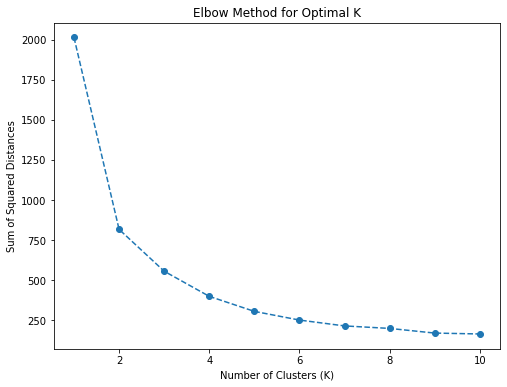

In [20]:
# manually visualize the elbow method using plotlib
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [21]:
from kneed import KneeLocator
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow
print("The optimal K for your model is", optimal_k)

The optimal K for your model is 3


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Membangun model pohon keputusan
clf = DecisionTreeClassifier(criterion='gini')  # Anda bisa menggunakan 'entropy' jika ingin entropi sebagai kriteria

# Melatih model pada data latih
clf.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = clf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.6985294117647058


In [ ]:
# Accuracy of LinearRegression on validation set: 0.7316176470588235 
# Akurasi ID3 : 0.6985294117647058 
# linear regresi lebih tinggi